# **FarSight: Long-Term Disease Prediction Using Unstructured Clinical Nursing Notes**
by Tushaar Gangavarapu, Gokul S Krishnan, Sowmya Kamath S, Jayakumar Jeganathan

In this paper, the authors use nursing notes to predict the onset disease ICD-9 code. This paper adopted a multi-class, multi-label approach. Here are the general process:

1.   Data: MIMIC-III (v1.4), total 4 tables was used (noteevents, admissions, patients and diagnosis_icd)
2.   Data Preprocess:
*   The MIMIC-III (v1.4) database contains 223,556 nursing notes among 2,083,180 note events, corresponding to 7,704 distinct patients. (filtered by CATEGORY = 'Nursing')
*   Using the age at the time of admission to the ICU, the records of neonates(age below 15) were identified and discarded.
*   Only the first admission to the ICU for each MIMIC-III patient was considered, and all the later admissions were discarded. For each admission, there are multiple ICD-9 diagnosis and nursing notes
*   The nursing notes are further preprocessed by tokenization, removing stop words, removing duplicating notes, etc.  
*   The grouped ICD-9 code is used as the classification labels
*   For the naive data, all the nursing notes of a patient are aggregated before merging it with all classification labels
*   For the FarSight data, each nursing note is merged with all classification labels
3.  Vectorization:
The following vectorization method is used for dimension reduction
*   NMF on BoW with Semantic Coherence(SC)

4.   Predictive Modeling:
Various methods are used to achieve a higher prediction accuracy.
*   Multi-Layer Perceptron(MLP)
*   Pretrained Bio_ClinicalBERT
*   Finetuned Bio_ClinicalBERT






In [1]:
!pip install --upgrade --force-reinstall numpy gensim scipy tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [1]:
!pip install scispacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 117.0 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5


In [2]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.4/917.4 kB 55.4 MB/s eta 0:00:00
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.1-py3-none-any.whl size=15870889 sha256=216d0237ec124f5cf8d63d1c255dfd518050bb1b7829442fb76e6acbad790e2c
  Stored in directory: /root/.cache/pip/wheels/f0/4d/eb/0d4f64bca5fb19915b27acb2aaab5391404b0f76092d41d96d
Successfully built en_core_sci_sm
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling w

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from google.colab.data_table import DataTable
import spacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import defaultdict
import re
import string
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import joblib
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv1D, Conv2D, Reshape, TimeDistributed, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score, average_precision_score
from gensim.corpora import Dictionary
from gensim.models.nmf import Nmf
from gensim.models import CoherenceModel
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
DataTable.max_columns = 50

In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **1. Set up data directory and loading data**

---



In [5]:
# View and modify the working path
import os
from google.colab import drive

# View current working directory
print("Current Working Directory:", os.getcwd())

# Mount Google Drive
drive.mount('/content/gdrive')

# Change working directory to your file position
path = "/content/gdrive/My Drive/BDH_Project/data"
os.chdir(path)

# Confirm the change
print("Working Directory:", os.getcwd())

Current Working Directory: /content
Mounted at /content/gdrive
Working Directory: /content/gdrive/My Drive/BDH_Project/data


In [7]:
# import data
df_icd9 = pd.read_csv('DIAGNOSES_ICD.csv.gz', compression='gzip')
df_note = pd.read_csv('NOTEEVENTS.csv')
df_ad = pd.read_csv('ADMISSIONS.csv')
df_pat = pd.read_csv('PATIENTS.csv')


<ipython-input-7-6923350344a1>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_note = pd.read_csv('NOTEEVENTS.csv')


## **2. Data Preprocessing**

## **2.1. Statistic of the Nursing Notes**

In [8]:
print(f"Nan in Notes dataset:{df_note.isna().sum()}")
print()
print(f"Total Row in Notes dataset:{df_note.shape[0]}")
print()
print(df_note.CATEGORY.value_counts())


Nan in Notes dataset:ROW_ID               0
SUBJECT_ID           0
HADM_ID         231836
CHARTDATE            0
CHARTTIME       316566
STORETIME       836776
CATEGORY             0
DESCRIPTION          0
CGID            836776
ISERROR        2082294
TEXT                 0
dtype: int64

Total Row in Notes dataset:2083180

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64


From TABLE 1 in the paper, The MIMIC-III (v1.4) database contains 223,556 nursing notes among 2,083,180 note events.

### **2.2 Filter out Nursing only data using CATEGORY == Nursing**

In [ ]:
df_nursing = df_note[df_note['CATEGORY'] == 'Nursing']
print(f"Total notes in Nursing dataset:{df_nursing.shape[0]}")
print(f"Unique patients in Nursing dataset:{df_nursing['SUBJECT_ID'].nunique()}")

Total notes in Nursing dataset:223556
Unique patients in Nursing dataset:7704


In [ ]:
# Assuming your nursing notes are in a DataFrame
# df_nursing = pd.read_csv(...) or however you load your notes
# Make sure 'TEXT' column exists
notes = df_nursing['TEXT'].dropna().astype(str)

total_notes = len(notes)
total_sentences = 0
total_words = 0
unique_words = set()

for note in tqdm(notes, desc="Processing notes"):
    sentences = sent_tokenize(note)
    words = word_tokenize(note)

    total_sentences += len(sentences)
    total_words += len(words)


# Final stats
stats = {
    "Total clinical nursing notes": total_notes,
    "Total sentences in the nursing notes": total_sentences,
    "Total words in the nursing notes": total_words,
    "Total unique words in the nursing notes": len(unique_words)
}

# Display the results as a DataFrame (you can print or save to CSV/LaTeX)
df_stats = pd.DataFrame.from_dict(stats, orient='index', columns=['Total'])
df_stats.reset_index(inplace=True)
df_stats.columns = ['Parameter', 'Total']
print(df_stats)

Processing notes: 100%|██████████| 223556/223556 [09:19<00:00, 399.68it/s]

                                 Parameter     Total
0             Total clinical nursing notes    223556
1     Total sentences in the nursing notes   4694552
2         Total words in the nursing notes  77852407
3  Total unique words in the nursing notes         0


### **2.3 Filter out Admission table to only keep first admission**

In [ ]:
df_ad['ADMITTIME'] = pd.to_datetime(df_ad['ADMITTIME'])
df_ad_sorted = df_ad.sort_values(['SUBJECT_ID', 'ADMITTIME'])
df_ad_final = df_ad_sorted.drop_duplicates(subset=['SUBJECT_ID'], keep='first')
print(f"Unique patients in Admission before filter:{df_ad['SUBJECT_ID'].nunique()}")
print(f"Data shape in Admission before filter:{df_ad.shape}")
print()
print(f"Unique patients in Admission after filter:{df_ad_final['SUBJECT_ID'].nunique()}")
print(f"Data shape in Admission after filter:{df_ad_final.shape}")

Unique patients in Admission before filter:46520
Data shape in Admission before filter:(58976, 19)

Unique patients in Admission after filter:46520
Data shape in Admission after filter:(46520, 19)


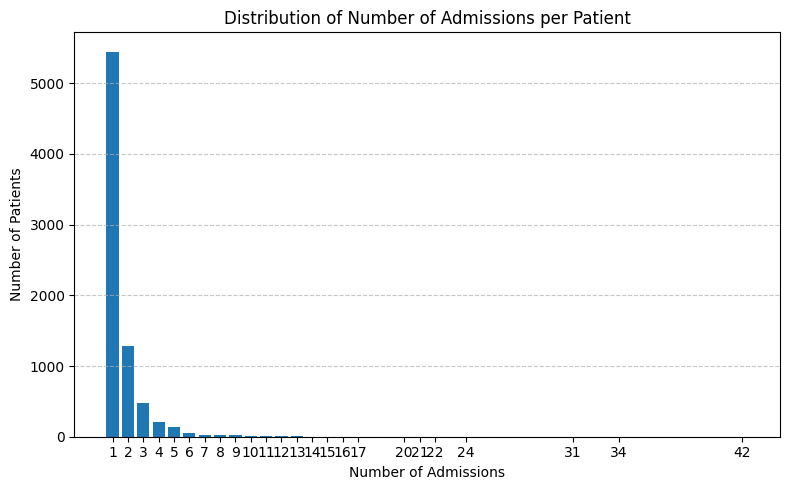

In [ ]:
# plot no. admission per subject
# Filter admissions to only include subjects from nursing notes
subjects_in_nursing = df_nursing['SUBJECT_ID'].unique()
df_ad_filtered = df_ad[df_ad['SUBJECT_ID'].isin(subjects_in_nursing)]
admission_counts = df_ad_filtered['SUBJECT_ID'].value_counts()
distribution = admission_counts.value_counts().sort_index()

# plot
plt.figure(figsize=(8, 5))
plt.bar(distribution.index, distribution.values)
plt.xlabel('Number of Admissions')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Admissions per Patient')
plt.xticks(distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **2.4 Join admission table and patient table, filter out patient with age > 15**

In [ ]:
# Merge with patients table
merged_df = pd.merge(df_ad_final, df_pat, on='SUBJECT_ID')

# Calculate age at admission
merged_df['DOB'] = pd.to_datetime(merged_df['DOB'])
#merged_df['AGE'] = merged_df['ADMITTIME'].dt.year- merged_df['DOB'].dt.year
def calculate_precise_age(row):
    dob = row['DOB']
    admit = row['ADMITTIME']
    # Base age in full years
    age_years = admit.year - dob.year

    # Try to build the "birthday in admit year"
    try:
        birthday_this_year = pd.Timestamp(admit.year, dob.month, dob.day)
    except ValueError:
        # Handle Feb 29 in non-leap years
        birthday_this_year = pd.Timestamp(admit.year, dob.month, 28)

    # Subtract 1 year if they haven't had their birthday yet
    if admit < birthday_this_year:
        age_years -= 1
        birthday_this_year = birthday_this_year - DateOffset(years=1)

    # Add fractional year based on days since birthday
    partial_year = (admit - birthday_this_year).days / 365.25
    return age_years + partial_year

# Apply the function row by row
merged_df['AGE'] = merged_df.apply(calculate_precise_age, axis=1)

# Filter out age <= 15
filtered_df = merged_df[merged_df['AGE'] > 15]
print(f"Unique patients after filter:{filtered_df['SUBJECT_ID'].nunique()}")
print(f"Data shape after filter:{filtered_df.shape}")
print(f"Median age:{filtered_df['AGE'].median()}")

Unique patients after filter:38645
Data shape after filter:(38645, 27)
Median age:65.60232717316906


### **2.5 Join merged admission_patient table with note table, remove error and duplicate**
#### Target number is 6532 patients and 140792 clinical notes

In [ ]:
merged_with_notes = pd.merge(filtered_df, df_nursing, on=["SUBJECT_ID", "HADM_ID"], how="inner")
print(f"Unique number of subjects:{merged_with_notes['SUBJECT_ID'].nunique()}")
print(f"Total number of notes:{merged_with_notes.shape[0]}")

Unique number of subjects:6521
Total number of notes:156654


In [ ]:
# sort the merged table to make sure it in chronically order
merged_with_notes['CHARTTIME'] = pd.to_datetime(merged_with_notes['CHARTTIME'])
merged_with_notes = merged_with_notes.sort_values(['SUBJECT_ID', 'CHARTTIME'])

In [ ]:
#target number is 6532 patients and 140792 clinical notes
filter_df_err_removed = merged_with_notes[merged_with_notes['ISERROR'].isna()]
filter_df_err_removed_dedup = filter_df_err_removed.drop_duplicates(subset=['SUBJECT_ID', 'TEXT'])
print(f"Unique number of subjects:{filter_df_err_removed_dedup['SUBJECT_ID'].nunique()}")
print(f"Unique number of HADM:{filter_df_err_removed_dedup['HADM_ID'].nunique()}")
print(f"Total number of notes:{filter_df_err_removed_dedup.shape[0]}")

Unique number of subjects:6520
Unique number of HADM:6520
Total number of notes:140681


In [ ]:
df_icd9.dropna(subset= 'ICD9_CODE', inplace= True)

### **2.6 FarSight aggregation**
We need to consolidate all the code for a patient for multilabel prediction. In the paper, the author mentioned ICD-9 codes of a given admission from
MIMIC-III are mapped into 19 distinct diagnostic groups, reference paper 9,

In [ ]:
def group_icd9(icd_code):
    code = str(icd_code).strip().upper()

    # assign ref and V code to group 19
    if code.startswith(('V', 'E')):
        return 19

    # transform the icd9 code, add decimal after the 3rd digit
    if code.isdigit() and len(code) > 3:
        real_code = code[:3] + '.' + code[3:]
    else:
      return 19

    try:
        num_code = float(real_code)
    except ValueError:
        return 19

    if 1 <= num_code <= 139:
        return 1
    elif 140 <= num_code <= 239:
        return 2
    elif 240 <= num_code <= 279:
        return 3
    elif 280 <= num_code <= 289:
        return 4
    elif 290 <= num_code <= 319:
        return 5
    elif 320 <= num_code <= 389:
        return 6
    elif 390 <= num_code <= 459:
        return 7
    elif 460 <= num_code <= 519:
        return 8
    elif 520 <= num_code <= 579:
        return 9
    elif 580 <= num_code <= 629:
        return 10
    elif 630 <= num_code <= 679:
        return 11
    elif 680 <= num_code <= 709:
        return 12
    elif 710 <= num_code <= 739:
        return 13
    elif 740 <= num_code <= 759:
        return 14
    elif 780 <= num_code <= 789:
        return 15
    elif 790 <= num_code <= 796:
        return 16
    elif 797 <= num_code <= 799:
        return 17
    elif 800 <= num_code <= 789:
        return 18

    else:
        return 19


In [ ]:
# transform code column
df_icd9['CODE_GROUP'] = df_icd9['ICD9_CODE'].apply(group_icd9)

In [ ]:
# aggregate icd9 code per patients
df_icd9_agg  = df_icd9.groupby(['SUBJECT_ID', 'HADM_ID'])['CODE_GROUP'].apply(lambda x: sorted(set(x))).reset_index()

In [ ]:
# FarSight aggregation, join with the other table
df_final_farsight = pd.merge(filter_df_err_removed_dedup, df_icd9_agg, on=["SUBJECT_ID", "HADM_ID"], how="inner")
print(f"Unique number of subjects:{df_final_farsight['SUBJECT_ID'].nunique()}")
print(f"Unique number of HADM:{df_final_farsight['HADM_ID'].nunique()}")
print(f"Total number of notes:{df_final_farsight.shape[0]}")

Unique number of subjects:6520
Unique number of HADM:6520
Total number of notes:140681


In [ ]:
df_final_farsight1 = df_final_farsight[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'CODE_GROUP']]

In [ ]:
df_final_farsight1.to_csv('df_final_farsight.csv', index=False)

### **2.7 Tokenization and Stopword Removal**
First, we removed multiple spaces and special characters. Next, employed the
NLTK tokenizer to facilitate the tokenization of nursing text. Utilizing the NLTK English stopword corpus, we removed stopwords from the generated tokens. Furthermore, punctuation marks (except hyphens and slashes) were also removed.
References to images (e.g., MRI_Scan.jpeg) were removed, and character case folding was performed. Before any further processing, medical concept normalization through disambiguation of abbreviations (into their respective long forms) was facilitated using CARD, an open-source framework for clinical abbreviation recognition and disambiguation. Lastly, suffix stripping was performed through stemming, followed by lemmatization for the conversion of the stripped tokens into their respective base forms. Additionally, we eliminated
the tokens appearing in less than ten nursing notes (e.g.,spot, cope, and inch) in order to lower the computational complexity of training (the total number of tokens pre- and post-elimination were 188,742 and 32,687 respectively)




In [ ]:
df_final_farsight = pd.read_csv('df_final_farsight.csv')

In [ ]:
import scispacy
from scispacy.abbreviation import AbbreviationDetector

nlp = spacy.load("en_core_sci_sm")
nlp.add_pipe("abbreviation_detector")

In [ ]:
def preprocess_clinical_text_column(text_column, min_doc_freq=10):

    # Load scispaCy model and abbreviation detector
    nlp = spacy.load("en_core_sci_sm")
    nlp.add_pipe("abbreviation_detector")

    # Set up tools and patterns
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    punct_to_remove = ''.join(p for p in string.punctuation if p not in ['-', '/'])
    punct_pattern = re.compile(f"[{re.escape(punct_to_remove)}]")
    image_pattern = re.compile(r'\S+\.(jpg|jpeg|png|gif|bmp|tiff|dicom)', re.IGNORECASE)

    # Tokenizer pipeline per document
    def preprocess_text(text):
        if not isinstance(text, str):
            return []

        text = text.lower()
        # Remove image references
        text = image_pattern.sub('', text)

        # Clean unwanted characters (preserve hyphen/slash)
        text = re.sub(r'[^A-Za-z0-9\s\-/]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip().lower()

        # Expand abbreviations using scispaCy
        try:
            doc = nlp(text)
            for abrv in doc._.abbreviations:
                text = text.replace(str(abrv), str(abrv._.long_form))
        except:
            pass  # continue even if abbreviation detection fails

        # Tokenize with NLTK
        tokens = word_tokenize(text)

        # Remove stopwords and unwanted punctuation
        tokens = [t for t in tokens if t not in stop_words and not punct_pattern.match(t)]

        # Stemming + lemmatization
        tokens = [lemmatizer.lemmatize(stemmer.stem(t)) for t in tokens]

        return tokens

    # Apply to the column
    processed_tokens = text_column.apply(preprocess_text)

    # Compute document frequency
    doc_freq = Counter()
    for tokens in processed_tokens:
        for token in set(tokens):
            doc_freq[token] += 1

    # Filter out rare tokens
    filtered_tokens = processed_tokens.apply(
        lambda tokens: [t for t in tokens if doc_freq[t] >= min_doc_freq]
    )

    return filtered_tokens


In [ ]:
#remove low frequency words
df_final_farsight['processed_tokens'] = preprocess_clinical_text_column(df_final_farsight['TEXT'], min_doc_freq=10)

/usr/local/lib/python3.11/dist-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)


In [ ]:
#32687 according to C 2) on page 7
distinct_tokens = {token for tokens in df_final_farsight['processed_tokens'] for token in tokens}
print("Number of distinct tokens:", len(distinct_tokens))

Number of distinct tokens: 33181


In [ ]:
df_final_farsight.to_pickle('df_farsight_token.pkl')

## **3. Vectorization**

In [12]:
# read in token data
df_farsight_token = pd.read_pickle('df_farsight_token.pkl')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

def split_data(df, test_size=0.2, random_state=42):
    """
    Split a DataFrame into train and test sets and binarize multi-label targets.
    Returns:
        X_train, X_test: Lists of tokenized input sequences.
        y_train_bin, y_test_bin: Binarized label arrays.

    """
    X = df['processed_tokens']
    y = df['CODE_GROUP']  # List of labels per sample (multi-label)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    mlb = MultiLabelBinarizer()
    y_train_bin = mlb.fit_transform(y_train)
    y_test_bin = mlb.transform(y_test)

    return X_train, X_test, y_train_bin, y_test_bin


In [14]:
X_train_far, X_test_far, y_train_far, y_test_far = split_data(df_farsight_token)

### **3.1 NMF on BoW with Semantic Coherence(SC)**

In [ ]:
# ====================
# TRAINING PHASE
# ====================
# Build a dictionary and corpus using the training tokens.
train_tokens = X_train_far.tolist()  # each element is a list of tokens
dictionary_train = Dictionary(train_tokens)
corpus_train = [dictionary_train.doc2bow(tokens) for tokens in train_tokens]

# Train the NMF model on the training corpus.
num_topics = 100  # optimal number based on your experiments
nmf_train = Nmf(corpus=corpus_train, id2word=dictionary_train, num_topics=num_topics, random_state=42)

# Compute the semantic coherence (SC) on the training set using the c_v measure (based on NPMI).
coherence_model_train = CoherenceModel(
    model=nmf_train,
    texts=train_tokens,
    dictionary=dictionary_train,
    coherence='c_v'
)
coherence_train = coherence_model_train.get_coherence()
print("Training Coherence Score (c_v):", coherence_train)

# ====================
# TESTING PHASE
# ====================
# Prepare the test tokens using the same dictionary.
test_tokens = X_test_far.tolist()
corpus_test = [dictionary_train.doc2bow(tokens) for tokens in test_tokens]

# Compute the semantic coherence on the test set.
# Note: We use the same trained NMF model and dictionary.
coherence_model_test = CoherenceModel(
    model=nmf_train,
    texts=test_tokens,
    dictionary=dictionary_train,
    coherence='c_v'
)
coherence_test = coherence_model_test.get_coherence()
print("Testing Coherence Score (c_v):", coherence_test)

# ====================
# OPTIONAL: Inspect Topics
# ====================
# Print the top 10 words for the first 10 topics for a quick inspection.
topics = nmf_train.show_topics(num_topics=10, num_words=10, formatted=False)
for topic_no, topic in topics:
    topic_words = [word for word, prob in topic]
    print(f"Topic {topic_no}: {topic_words}")

Training Coherence Score (c_v): 0.4764419067504403
Testing Coherence Score (c_v): 0.47424322919956036
Topic 62: ['s/p', 'left', 'fractur', 'fx', 'pain', 'need', 'pt', 'fall', 'trauma', 'injuri']
Topic 47: ['note', 'l', 'requir', 'v', 'day', 'intub', 'chronic', 'area', 'shift', 'admiss']
Topic 82: ['-', 'right', 'r', 'fractur', 'show', 'pt', 'l', 'side', 'hip', 'osh']
Topic 78: ['pain', 'start', 'abdomin', 'deni', 'need', 'ed', 'nausea', 'abdomen', 'day', 'present']
Topic 0: ['04', '/', 'meq/l', 'mg/dl', 'valuabl', 'o2', 'transfer', 'weight', 'heart', 'ml']
Topic 91: ['remain', 'assess', 'intub', 'respons', 'plan', 'action', 'elev', 'output', 'acut', 'unchang']
Topic 33: ['continu', 'order', 'per', 'lab', 'monitor', 'close', 'toler', 'support', 'team', 'follow']
Topic 14: ['pt', 'time', 'also', 'assess', 'throughout', 'abl', 'bed', 'medic', 'monitor', 'state']
Topic 51: ['pt', 'plan', 'assess', 'today', 'action', 'respons', 'pain', 'abl', 'back', 'transfer']
Topic 31: ['assess', 'plan',

In [ ]:
def get_topic_vector(model, dictionary, tokens, num_topics):
    """
    Given a trained NMF model, a dictionary, and a tokenized document,
    returns a fixed-length topic vector representing the document's topic distribution.
    """
    # Convert the document into bag-of-words format.
    bow = dictionary.doc2bow(tokens)
    # Get the topic distribution for the document.
    # Using minimum_probability=0 ensures that each topic is included (if supported).
    topic_dist = model.get_document_topics(bow, minimum_probability=0)
    # Convert list of (topic_id, probability) to a dictionary.
    topic_dict = dict(topic_dist)
    # Create a fixed-length vector for all topics.
    vector = [topic_dict.get(i, 0) for i in range(num_topics)]
    return vector

# Now compute the topic vectors for the training set.
train_topic_vectors = [get_topic_vector(nmf_train, dictionary_train, tokens, num_topics)
                       for tokens in train_tokens]

# Similarly for the test set.
test_topic_vectors = [get_topic_vector(nmf_train, dictionary_train, tokens, num_topics)
                      for tokens in test_tokens]

# Optionally, convert to NumPy arrays:
import numpy as np
train_topic_vectors = np.array(train_topic_vectors)
test_topic_vectors = np.array(test_topic_vectors)

print("Training NMF vectors shape:", train_topic_vectors.shape)
print("Testing NMF vectors shape:", test_topic_vectors.shape)

from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/BDH_Project/data"
os.chdir(path)
np.save('train_topic_vectors.npy', train_topic_vectors)
np.save('test_topic_vectors.npy', test_topic_vectors)

Training NMF vectors shape: (112544, 100)
Testing NMF vectors shape: (28137, 100)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
train_topic_vectors = np.load('train_topic_vectors.npy')
test_topic_vectors = np.load('test_topic_vectors.npy')

## **4. Predictive Modeling**

Creating Evaluation Metrics

In [10]:
def evaluate(y_test, y_pred, y_pred_prob):
    num_classes = y_test.shape[1]

    # AUROC per label
    auc_list = []
    for i in range(num_classes):
        y_true_label = y_test[:, i]
        y_pred_label = y_pred_prob[:, i]
        if len(np.unique(y_true_label)) < 2:
            continue  # Skip if AUROC is undefined
        auc = roc_auc_score(y_true_label, y_pred_label)
        auc_list.append(auc)
    auroc = np.mean(auc_list) if auc_list else np.nan

    # AUPRC per label
    ap_list = []
    for i in range(num_classes):
        y_true_label = y_test[:, i]
        y_pred_label = y_pred_prob[:, i]
        if len(np.unique(y_true_label)) < 2:
            continue  # Skip if AUPRC is undefined
        ap = average_precision_score(y_true_label, y_pred_label)
        ap_list.append(ap)
    auprc = np.mean(ap_list) if ap_list else np.nan

    return {
        'label_wise ACC': np.mean(y_test == y_pred),
        'F1': f1_score(y_test, y_pred, average='samples'),
        'MCC': matthews_corrcoef(y_test.flatten(), y_pred.flatten()),
        'AUROC': auroc,
        'AUPRC': auprc
    }

### **4.1. Model Training - MLP**

In [15]:
# Assuming:
# - train_topic_vectors and test_topic_vectors are already NumPy arrays (e.g., shape (num_samples, 100))
# - y_train_far_bin and y_test_far_bin are binarized label arrays with shape (num_samples, 19)

input_dim = train_topic_vectors.shape[1]  # e.g., 100 topics
num_classes = y_train_far.shape[1]      # 19 classes

# Build the MLP model
model = Sequential()
model.add(Dense(75, activation='relu', input_shape=(input_dim,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy')
model.summary()

# Train the MLP model
history = model.fit(
    train_topic_vectors,
    y_train_far,
    batch_size=128,
    epochs=8,
    validation_data=(test_topic_vectors, y_test_far)
)

# Obtain predictions on the test set (probabilities)
y_pred_prob = model.predict(test_topic_vectors)
# Threshold probabilities to get binary predictions (using 0.5 as cutoff)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute evaluation metrics
evaluate(y_test_far, y_pred, y_pred_prob)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         1,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,639 (33.75 KB)

 Trainable params: 8,639 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4471 - val_loss: 0.3390
Epoch 2/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3370 - val_loss: 0.3320
Epoch 3/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3316 - val_loss: 0.3298
Epoch 4/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3294 - val_loss: 0.3285
Epoch 5/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3288 - val_loss: 0.3276
Epoch 6/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3276 - val_loss: 0.3270
Epoch 7/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3265 - val_loss: 0.3265
Epoch 8/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3261 - val_loss: 0.3260
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


{'label_wise ACC': 0.8347422560025183,
 'F1': 0.8922415173692541,
 'MCC': 0.48121518710428884,
 'AUROC': 0.7477251432201757,
 'AUPRC': 0.8580636182649178}

### **4.2. Model Training - MLP on Pretrained Bio_ClinicalBERT**
Please refer to the following for more details: https:
//huggingface.co/emilyalsentzer/Bio_Clin
icalBERT

In [16]:
def split_data(df, test_size=0.2, random_state=42):
    """
    Split a DataFrame into train and test sets and binarize multi-label targets.
    Returns:
        X_train, X_test: Lists of tokenized input sequences.
        y_train_bin, y_test_bin: Binarized label arrays.

    """
    X = df['TEXT']
    y = df['CODE_GROUP']  # List of labels per sample (multi-label)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    mlb = MultiLabelBinarizer()
    y_train_bin = mlb.fit_transform(y_train)
    y_test_bin = mlb.transform(y_test)

    return X_train, X_test, y_train_bin, y_test_bin, mlb

In [17]:
X_train_far, X_test_far, y_train_far, y_test_far, mlb_far = split_data(df_farsight_token)

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model.to(device)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [19]:
def get_bert_embedding(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    # Return [CLS] token (first token)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

In [20]:
def embed_texts(texts, tokenizer, model, device):
    embeddings = []
    for text in tqdm(texts, desc="Embedding notes"):
        try:
            emb = get_bert_embedding(text, tokenizer, model, device)
        except Exception as e:
            print("Skipping text due to error:", e)
            emb = np.zeros(768)  # fallback
        embeddings.append(emb)
    return np.vstack(embeddings)

X_train_Far = embed_texts(X_train_far, tokenizer, model, device)
X_test_Far = embed_texts(X_test_far, tokenizer, model, device)


Embedding notes: 100%|██████████| 28137/28137 [12:32<00:00, 37.41it/s]


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

mlp = Sequential([
    Dense(75, activation='relu', input_shape=(768,)),
    Dense(len(mlb_far.classes_), activation='sigmoid')
])
mlp.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = mlp.fit(X_train_Far, y_train_far,
                  validation_data=(X_test_Far, y_test_far),
                  epochs=8,
                  batch_size=128,
                  callbacks=[early_stop],
                  verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0030 - loss: 0.3616 - val_accuracy: 0.0000e+00 - val_loss: 0.3238
Epoch 2/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3235 - val_accuracy: 0.0000e+00 - val_loss: 0.3211
Epoch 3/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 3.3227e-05 - loss: 0.3196 - val_accuracy: 0.0000e+00 - val_loss: 0.3194
Epoch 4/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 7.3258e-05 - loss: 0.3176 - val_accuracy: 3.5540e-05 - val_loss: 0.3173
Epoch 5/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 8.7737e-05 - loss: 0.3155 - val_accuracy: 3.5540e-05 - val_loss: 0.3149
Epoch 6/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 8.0138e-05 - loss: 0.3136 - val_accuracy: 3.5540e-05 - val_loss: 0.3141
Epoch 7/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 9.4847e-05 - loss: 0.3132 - val_accuracy: 3.5540e-05 - val_loss: 0.3137
Epoch 8/8
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accura

In [22]:
y_pred_prob = mlp.predict(X_test_Far)
y_pred = (y_pred_prob > 0.5).astype(int)
evaluate(y_test_far, y_pred, y_pred_prob)

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


{'label_wise ACC': 0.8440360684203312,
 'F1': 0.898134689075536,
 'MCC': 0.5100901223100083,
 'AUROC': 0.7872540939812089,
 'AUPRC': 0.8817496412484611}

### **4.3. Model Training - Finetuned Bio_ClinicalBERT**

In [24]:
mlb = MultiLabelBinarizer()
df_farsight_token['labels'] = mlb.fit_transform(df_farsight_token['CODE_GROUP']).tolist()

In [26]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_farsight_token['TEXT'].tolist(), df_farsight_token['labels'].tolist(), test_size=0.2, random_state=42)

In [27]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

In [28]:
from datasets import Dataset

train_ds = Dataset.from_dict({"text": train_texts, "labels": train_labels})
test_ds = Dataset.from_dict({"text": test_texts, "labels": test_labels})


train_ds = Dataset.from_dict({
    "text": train_texts,
    "labels": [np.array(lbl, dtype=np.float32) for lbl in train_labels]
})

test_ds = Dataset.from_dict({
    "text": test_texts,
    "labels": [np.array(lbl, dtype=np.float32) for lbl in test_labels]
})


train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/112544 [00:00<?, ? examples/s]

Map:   0%|          | 0/28137 [00:00<?, ? examples/s]

In [29]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT",
    num_labels=len(train_labels[0]),
    problem_type="multi_label_classification"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    output_dir="clinicalbert-multilabel",
    eval_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    logging_steps=50,
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds
)


In [31]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mr-yuanzhen (mr-yuanzhen-georgia-tech-alumni-association) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.228300,0.209806
2,0.141000,0.150798
3,0.115500,0.121048
4,0.079400,0.115400


TrainOutput(global_step=56272, training_loss=0.1619539380493, metrics={'train_runtime': 48608.8941, 'train_samples_per_second': 9.261, 'train_steps_per_second': 1.158, 'total_flos': 1.1845904423426458e+17, 'train_loss': 0.1619539380493, 'epoch': 4.0})

In [32]:
# Predict
predictions = trainer.predict(test_ds).predictions
probs = torch.sigmoid(torch.tensor(predictions)).numpy()  # convert logits to probabilities

# Evaluate
y_true = np.array(test_labels)
y_pred = (probs > 0.5).astype(int)  # thresholding for multilabel

evaluate(y_true, y_pred, probs)

{'label_wise ACC': 0.9544778354886042,
 'F1': 0.9688195782561334,
 'MCC': 0.865253719468421,
 'AUROC': 0.9726510624735064,
 'AUPRC': 0.9878320637327382}